In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
import seaborn as sns

## Filter data

In [9]:
def filter_data(data_sent , max_flux= -12):
    data = data_sent.copy()
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params).reset_index(drop=True)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [12]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    data = filter_data(data)
    #display(data)
    data_id = data[['obs_id' ,'class' ,'src_n' , 'src_id' ,'significance' , ]]
    data_id = data_id.reset_index(drop=True)
    data_val = data.drop(['index' , 'class' ,'src_n' , 'src_id' ,'significance' , 'obs_id'] , axis=1)
    data_val = reduce_fn(data_val)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

In [13]:

train_bh = pd.read_csv('../processed_data/BH_.csv')
train_bh = train_bh.sample(frac=1)
#train_bh = filter_data(train_bh , max_flux=-12)


train_ns = pd.read_csv('../processed_data/NS_.csv' )
train_ns = train_ns.sample(frac=1)
train_ns = filter_data(train_ns , max_flux=-12)


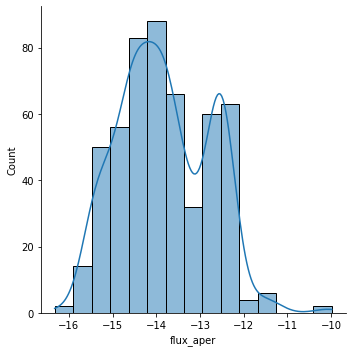

In [14]:
train_cv = pd.read_csv('../processed_data/CV_.csv')
train_cv = train_cv.sample(frac=1)
#train_cv = filter_data(train_cv , max_flux=-12)
sns.displot(train_cv['flux_aper'] , kde=True)

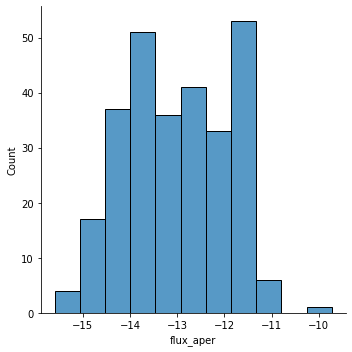

In [28]:

train_plsr = pd.read_csv('../processed_data/PULSAR_.csv')
dist_data = pd.read_csv('../distances/xrb-pulsar.csv')['B_ID']
train_plsr = train_plsr[~train_plsr['src_id'].isin(dist_data)]
train_plsr = train_plsr.sample(frac=1)
#train_plsr = filter_data(train_plsr , max_flux=-12)
sns.displot(train_plsr['flux_aper'])
plt.show()

In [29]:
train_plsr['src_id'].value_counts().sort_values()

PL0001     1
PL0028     1
PL0033     1
PL0131     1
PL0052     1
          ..
PL0065     8
PL0010     9
PL0009     9
PL0003    17
PL0099    59
Name: src_id, Length: 100, dtype: int64

In [31]:

train = pd.concat([train_bh , train_ns  , train_cv , train_plsr] , axis=0)
train = train.replace('NS' , 'XRB')
train = train.replace('BH' , 'XRB')
train =  train.sample(frac=1).reset_index(drop=True)
display(train)


,index,obs_id,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,755,CV_OBS_755,CV,XMMSL2 J004231.9+41162,CV0110,4132.7,174.76,172643.30000,False,False,...,0.000149,0.000321,3.912,15.8700,23.930,8.4190,0.000031,5.292,NaN,1.431
1,25,PULSAR_OBS_25,PULSAR,PSR J0248+6021,PL0007,9219.4,1.84,85.76846,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,159,BH_OBS_159,XRB,J1745-2900,BH0027,4977.8,337.00,462011.40000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,244,NS_OBS_244,XRB,XMMU J004245.2+41172,NS0044,NaN,49.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,CV_OBS_6,CV,[HPH2013] 100,CV0002,4117.4,37.03,4392.42200,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,228,NS_OBS_228,XRB,XMMU J004245.2+41172,NS0044,NaN,49.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,167,CV_OBS_167,CV,[HPH2013] 160,CV0016,4663.4,19.70,1106.93000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564,121,CV_OBS_121,CV,[HPH2013] 143,CV0011,3974.8,10.38,565.85810,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,648,CV_OBS_648,CV,CXOGLB J002411.8-72044,CV0092,4691.1,5.00,159.24960,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train['class'].value_counts()

CV        786
XRB       501
PULSAR    280
Name: class, dtype: int64

# RF imputer

In [33]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [34]:
def rf_impute(d, i ):
    data = pd.concat([i , d] , axis=1)
    data = data.drop(columns=['src_n' , 'src_id' , 'significance' , 'obs_id'])
    rf_imputer = RandomForestImputer(
        data=data , 
        target_variable_name='class' , 
        forbidden_features_list=[] , 
        
    )
    rf_imputer.set_ensemble_model_parameters(n_estimators=300 , additional_estimators = 50 )
    new_data =  rf_imputer.train(sample_size = 0, path_to_save_dataset='processed_data/rf_imp.csv')
    new_data = new_data.drop(columns= ['class'])
    return new_data , rf_imputer

In [46]:
train_cv_pl = train[train['class'].isin(['XRB' ,   'PULSAR'])].reset_index(drop=True)
train_cv_pl

,index,obs_id,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,25,PULSAR_OBS_25,PULSAR,PSR J0248+6021,PL0007,9219.4,1.84,85.76846,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159,BH_OBS_159,XRB,J1745-2900,BH0027,4977.8,337.00,462011.40000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,244,NS_OBS_244,XRB,XMMU J004245.2+41172,NS0044,NaN,49.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,292,PULSAR_OBS_292,PULSAR,PSR J1809-2332,PL0087,9695.1,16.03,1160.77300,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161,BH_OBS_161,XRB,J1745-2900,BH0027,27601.2,337.00,462011.40000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,198,NS_OBS_198,XRB,XMMU J004245.2+41172,NS0044,NaN,49.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,255,NS_OBS_255,XRB,XMMU J004245.2+41172,NS0046,NaN,4.71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,0,BH_OBS_0,XRB,1A 0620-00,BH0001,41932.7,23.63,3822.52900,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,228,NS_OBS_228,XRB,XMMU J004245.2+41172,NS0044,NaN,49.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_val , data_id   = extract_data(train_cv_pl ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )

In [48]:
new_data , random_forest_imputer = rf_impute(data_val, data_id)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')



- 19078 VALUE(S) CONVERGED!
- 5395 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19373 VALUE(S) CONVERGED!
- 5100 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 20308 VALUE(S) CONVERGED!
- 4165 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 20691 VALUE(S) CONVERGED!
- 3782 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 24371 VALUE(S) CONVERGED!
- 102 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 24451 VALUE(S) CONVERGED!
- 22 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 24464 VALUE(S) CONVERGED!
- 9 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 24467 VALUE(S) CONVERGED!
- 6 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 24473 VALUE(S) CONVERGED!
- 0 VALUE(S) REMAINING!

- ALL VALUES CONVERGED!

- TOTAL ITERATIONS: 45

- NEW DATASET SAVED in: processed_data/rf_imp.csv


In [ ]:
train

,index,obs_id,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,401,CV_OBS_401,CV,CXOGLB J002402.5-72051,CV0070,22.52,-14.526659,-14.519706,-14.182765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,BH_OBS_47,XRB,CXOU J100506.7-07443,BH0014,11.41,-15.370285,-13.414426,-15.903438,-15.907279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,139,PULSAR_OBS_139,PULSAR,PSR J1111-6039,PL0038,23.20,-14.504178,-15.563678,-13.660946,-12.740167,...,1.442000e-05,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734
3,136,NS_OBS_136,XRB,IGR J17464-2811,NS0030,6.94,-14.030211,-13.827397,-13.970616,-11.797239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290,PULSAR_OBS_290,PULSAR,PSR J1809-233,PL0086,2.15,NaN,NaN,-14.659358,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,239,NS_OBS_239,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.327533,-15.003795,-14.285335,-13.915781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,136,PULSAR_OBS_136,PULSAR,PSR J1101-6101,PL0036,31.13,-14.009972,-13.354774,-13.381847,-12.376234,...,1.308000e-05,0.000018,1.221,100.000,NaN,64.020,94.52,101.8,87.73,1.141
1393,184,BH_OBS_184,XRB,J1745-2900,BH0027,337.00,-15.308653,NaN,-14.283329,-11.692932,...,1.409000e-03,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057
1394,165,PULSAR_OBS_165,PULSAR,PSR J1418-605,PL0053,12.04,-15.399245,-12.151565,-14.505706,-13.234928,...,7.302000e-07,0.000002,0.581,100.000,NaN,26.420,209.50,245.5,181.20,0.628


In [ ]:
pd.read_csv('processed_data/rf_imp.csv')

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat,class
0,-14.526659,-14.519706,-14.182765,-13.000000,-14.081131,-15.392009,-13.000000,-14.667764,-13.000000,-14.482540,...,0.000000,1.000,19.000,51.000,11.000,160.00,182.0,170.00,1.000,CV
1,-15.370285,-13.414426,-15.903438,-15.907279,-15.777804,-15.734004,-14.550059,-17.049684,-13.000000,-13.000000,...,0.000000,1.000,19.000,48.000,11.000,155.00,182.0,161.00,1.000,PULSAR
2,-14.504178,-15.563678,-13.660946,-12.740167,-12.696156,-14.658170,-13.000000,-13.726767,-12.787812,-12.733533,...,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734,CV
3,-14.030211,-13.827397,-13.970616,-11.797239,-11.805208,-15.702239,-13.000000,-15.583359,-11.925184,-11.931072,...,0.000000,1.000,19.000,50.000,11.000,162.00,184.0,171.00,1.000,CV
4,-14.000000,-13.000000,-14.659358,-13.000000,-14.884057,-14.000000,-13.000000,-15.726304,-13.000000,-13.000000,...,0.000000,1.000,15.000,33.000,8.000,137.00,158.0,147.00,1.000,XRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,-14.327533,-15.003795,-14.285335,-13.915781,-13.699839,-14.509901,-13.000000,-14.459420,-14.111371,-13.802995,...,0.000000,1.000,19.000,51.000,11.000,162.00,182.0,170.00,1.000,CV
1392,-14.009972,-13.354774,-13.381847,-12.376234,-12.337337,-14.153477,-14.178683,-13.436756,-12.410609,-12.366128,...,0.000018,1.221,100.000,34.000,64.020,94.52,101.8,87.73,1.141,XRB
1393,-15.308653,-13.000000,-14.283329,-11.692932,-11.701147,-14.000000,-13.000000,-14.579219,-11.717831,-11.726073,...,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057,CV
1394,-15.399245,-12.151565,-14.505706,-13.234928,-13.227165,-16.244354,-13.129304,-14.686133,-13.314258,-13.298432,...,0.000002,0.581,100.000,39.000,26.420,209.50,245.5,181.20,0.628,PULSAR


In [51]:
data_id

,obs_id,class,src_n,src_id,significance
0,NS_OBS_312,XRB,XMMU J004245.2+41172,NS0046,4.71
1,BH_OBS_144,XRB,J1745-2900,BH0027,337.00
2,NS_OBS_186,XRB,XMMU J004245.2+41172,NS0044,49.26
3,PULSAR_OBS_148,PULSAR,PSR J1124-591,PL0042,144.29
4,NS_OBS_140,XRB,KS 1731-260,NS0033,14.81
...,...,...,...,...,...
661,NS_OBS_97,XRB,GRS 1741.9-2853,NS0021,376.06
662,PULSAR_OBS_206,PULSAR,PSR J1718-3825,PL0075,15.54
663,NS_OBS_41,XRB,1A 1742-289,NS0001,167.36
664,NS_OBS_202,XRB,XMMU J004245.2+41172,NS0044,49.26


In [49]:
sample_used                         = random_forest_imputer.get_sample()
features_type_prediction            = random_forest_imputer.get_features_type_predictions()
target_variable_type_prediction     = random_forest_imputer.get_target_variable_type_prediction()
encoded_features                    = random_forest_imputer.get_encoded_features()
encoded_target_variable             = random_forest_imputer.get_target_variable_encoded()
final_proximity_matrix              = random_forest_imputer.get_proximity_matrix()
final_distance_matrix               = random_forest_imputer.get_distance_matrix()
weighted_averages                   = random_forest_imputer.get_nan_features_predictions(option="all")
convergent_values                   = random_forest_imputer.get_nan_features_predictions(option="conv")
divergent_values                    = random_forest_imputer.get_nan_features_predictions(option="div")
ensemble_model_parameters           = random_forest_imputer.get_ensemble_model_parameters()
all_target_value_predictions        = random_forest_imputer.get_nan_target_values_predictions(option="all")
target_value_predictions            = random_forest_imputer.get_nan_target_values_predictions(option="one")


In [50]:
encoded_features_norm = norm_data(encoded_features)
encoded_features_norm

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,0.584920,0.449421,0.298488,0.319987,0.315704,0.676589,0.558162,0.287433,0.320121,0.315777,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
1,0.239339,0.419015,0.261205,0.508282,0.501328,0.676589,0.558162,0.644405,0.432990,0.421431,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
2,0.270491,0.449421,0.569761,0.690282,0.100391,0.231116,0.558162,0.644405,0.543315,0.527285,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
3,0.771481,0.665612,0.846150,0.869301,0.890507,0.809757,0.687324,0.870331,0.885825,0.902049,...,0.004674,0.004926,0.180361,0.053653,0.001344,0.049934,0.024508,0.023796,0.025083,0.076701
4,0.319418,0.449421,0.453414,0.173254,0.364577,0.386872,0.558162,0.506056,0.543315,0.410960,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.584920,0.449421,0.569761,0.640397,0.683749,0.676589,0.558162,0.644405,0.645632,0.527285,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
662,0.569984,0.157090,0.584821,0.658912,0.670911,0.642519,0.756898,0.636787,0.692912,0.702486,...,0.000408,0.000474,0.272172,1.000000,0.010706,0.216699,0.004307,0.006744,0.002393,0.095068
663,0.308137,0.449421,0.307581,0.330395,0.320913,0.676589,0.558162,0.644405,0.167658,0.143161,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344
664,0.545013,0.588916,0.529895,0.517482,0.540562,0.518372,0.558162,0.491126,0.423002,0.530500,...,0.000000,0.000000,0.082303,0.026867,0.003883,0.018096,0.045674,0.048860,0.049231,0.067344


In [42]:
processed_data_all = pd.concat([data_id , encoded_features_norm] , axis=1)
processed_data_all.to_csv('../processed_data/train_norm_rf_impute_cv_pulsar')

In [52]:
processed_data_all = pd.concat([data_id , encoded_features] , axis=1)
processed_data_all.to_csv('../processed_data/train_none_rf_impute_xrb_pulsar')

In [53]:
processed_data_all

,obs_id,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,NS_OBS_312,XRB,XMMU J004245.2+41172,NS0046,4.71,-14.000000,-14.000000,-15.161088,-14.636576,-14.615647,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
1,BH_OBS_144,XRB,J1745-2900,BH0027,337.00,-15.420102,-14.154716,-15.320663,-13.804377,-13.800794,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
2,NS_OBS_186,XRB,XMMU J004245.2+41172,NS0044,49.26,-15.292089,-14.000000,-14.000000,-13.000000,-15.560825,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
3,PULSAR_OBS_148,PULSAR,PSR J1124-591,PL0042,144.29,-13.233364,-12.899974,-12.817015,-12.208801,-12.092374,...,0.000126,0.000156,1.722,5.67,6.466,5.009,45.610,49.72,41.820,1.081
4,NS_OBS_140,XRB,KS 1731-260,NS0033,14.81,-15.091033,-14.000000,-14.497983,-15.285084,-14.401100,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,NS_OBS_97,XRB,GRS 1741.9-2853,NS0021,376.06,-14.000000,-14.000000,-14.000000,-13.220476,-13.000000,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
662,PULSAR_OBS_206,PULSAR,PSR J1718-3825,PL0075,15.54,-14.061380,-15.487449,-13.935542,-13.138645,-13.056357,...,0.000011,0.000015,2.398,100.00,49.000,20.770,8.015,14.15,4.065,1.240
663,NS_OBS_41,XRB,1A 1742-289,NS0001,167.36,-15.137392,-14.000000,-15.122168,-14.590574,-14.592779,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000
664,NS_OBS_202,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.163993,-13.290221,-14.170632,-13.763715,-13.628563,...,0.000000,0.000000,1.000,3.00,18.000,2.000,85.000,102.00,82.000,1.000


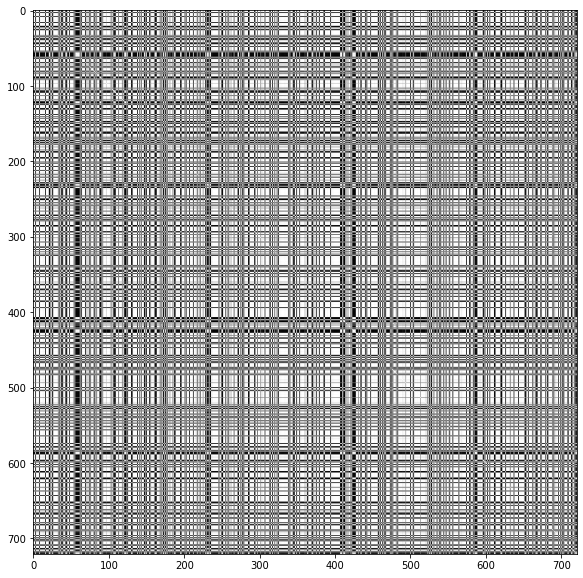

In [45]:
plt.figure(figsize=(12,10))
plt.imshow(
    final_proximity_matrix , 
    cmap='gray'
)
plt.show()

# Median Imputer

In [ ]:
data_val , data_id   = extract_data(train ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )
data_val

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
750,-14.483597,NaN,-13.812197,-13.112946,-13.041197,-14.932185,NaN,-13.943476,-13.313632,-13.189499,...,0.000008,0.000024,0.788,6.567,23.4700,3.2870,61.430,87.670,40.630,0.769
665,-12.922269,-13.241012,-12.835053,-12.467755,-12.251424,-13.072424,NaN,-12.935542,-12.601713,-12.324497,...,0.000285,0.000573,2.902,4.410,7.1390,2.9710,9.810,18.430,2.344,1.210
165,-14.926282,NaN,-14.977572,-14.232696,-14.145087,-15.428408,NaN,-15.375615,-14.661145,-14.395450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,-12.892790,-11.502379,-12.737075,-12.251812,-12.085551,-13.018907,-12.127145,-12.827981,-12.352031,-12.144723,...,0.000268,0.000448,2.787,5.621,8.9650,3.9080,11.190,18.610,4.568,1.256
1147,-14.237922,-14.302074,-13.168002,-11.964570,-11.944622,-14.302683,-14.523893,-13.189029,-11.975514,-11.954286,...,0.000034,0.000038,1.178,100.000,NaN,94.8000,163.200,166.300,160.100,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-13.807990,-11.905529,-13.896196,-13.964570,-13.449160,-14.115431,NaN,-14.148008,NaN,-13.766243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1229,-13.913284,-14.651111,-13.914709,-13.469544,-13.262489,-13.992252,-14.898597,-14.010728,-13.586197,-13.315693,...,0.000060,0.000106,2.654,4.826,6.9410,3.5510,2.811,6.262,NaN,0.561
952,-14.702239,-15.650334,-14.382475,-13.675923,-13.605899,-14.950782,NaN,-14.578067,-13.862646,-13.727926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,-12.905529,-12.485054,-12.744969,-12.769040,-12.364919,-13.020770,NaN,-12.818728,-13.239955,-12.472757,...,0.001667,0.004467,0.790,0.829,0.9967,0.6914,42.260,52.730,33.240,0.811
